In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
#Load data
data = pd.read_csv("C:/Users/marco/Desktop/customer_data.csv")
data.head(3)

,Client ID,Age,Annual Income (k$),Spending Score (1-100),Favorite Product Category
0,1,56,89,47,Books
1,2,69,91,86,Home
2,3,46,46,23,Electronics


In [9]:
#Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Client ID                  200 non-null    int64 
 1   Age                        200 non-null    int64 
 2   Annual Income (k$)         200 non-null    int64 
 3   Spending Score (1-100)     200 non-null    int64 
 4   Favorite Product Category  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
#Data descriptive statistics
data.describe()

,Client ID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [29]:
#Transform features by scaling each feature to a given range
scale = MinMaxScaler()

#Fit to data, then transform it
scaled_data = scale.fit_transform(data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
scaled_data

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

In [100]:
#Principal component analysis (PCA) configured to reduce to 2 dimensions
pca = PCA(n_components=2)

#Fit scaled data into PCA
pca_results = pca.fit_transform(scaled_data)

In [102]:
#Singular Value Decomposition (SVD)
U, Sigma, VT = np.linalg.svd(scaled_data)

#Select first two singular components to reduce dimensions
k = 2
svd_results = U[:,:k]*Sigma[:k]

In [136]:
#Clustering the data into three clusters
kmeans = KMeans(n_clusters=3, random_state = 42)

#Compute cluster centers and predict cluster index for each sample
kmeans_clusters = kmeans.fit_predict(scaled_data)

#Applying hierarchical clustering
#The "ward" method uses the Ward criterion to minimize the variance within each cluster
linked = linkage(scaled_data, method = "ward")

M:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
M:\Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


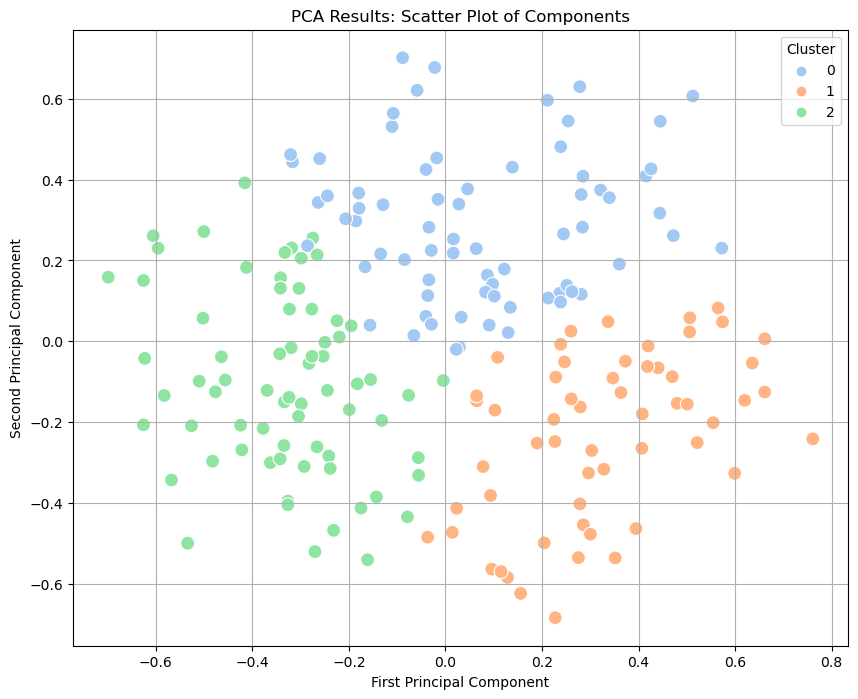

In [170]:
#PCA Results: Scatter Plot of Components#
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_results[:,0], y=pca_results[:,1], hue = kmeans_clusters, palette="pastel", s=100)
plt.title("PCA Results: Scatter Plot of Components")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title="Cluster")
plt.grid();

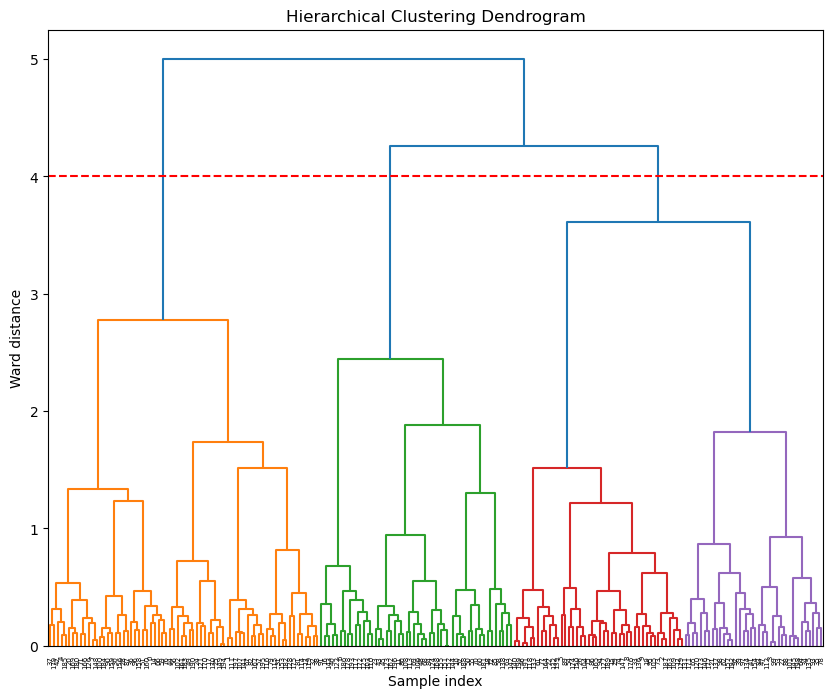

In [275]:
#Hierarchical Clustering Dendrogram
plt.figure(figsize=(10,8))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Ward distance")
plt.axhline(y = 4, color = "r", linestyle = "--"); #Partition into three groups

In [263]:
#Creating DateFrame storing all Features and Cluster number
cluster_info = pd.DataFrame({
    "Cluster": kmeans_clusters,
    "Age": data["Age"],
    "Income": data["Annual Income (k$)"],
    "Spending": data["Spending Score (1-100)"]
})

cluster_info.sort_values("Cluster", inplace = True)

#For each cluster, create a cluster_data variable to print each cluster's statistical information
for cluster in cluster_info["Cluster"].unique():
    cluster_data = cluster_info[cluster_info["Cluster"]==cluster]
    print(f"Cluster {cluster+1}:")
    print(f"- Average age: {cluster_data['Age'].mean():.0f}")
    print(f"- Average income (k$): {cluster_data['Income'].mean():.2f}")
    print(f"- Average spending score (1-100): {cluster_data['Spending'].mean():.2f}")
    print()
    

Cluster 1:
- Average age: 33
- Average income (k$): 68.60
- Average spending score (1-100): 70.71

Cluster 2:
- Average age: 58
- Average income (k$): 95.47
- Average spending score (1-100): 58.86

Cluster 3:
- Average age: 42
- Average income (k$): 49.79
- Average spending score (1-100): 21.63



In [269]:
# Cluster 1: Young Adults with High Spending
# This group consists of individuals with an average age of 33 years and an average income of $68.60k. 
# Their spending score is high (70.71/100), indicating that they tend to spend more compared to the other groups. 
# They are likely active consumers, interested in experiences, entertainment, and impulsive purchases.

# Cluster 2: Older Adults with High Income and Moderate Spending
# People in this group have an average age of 58 years and the highest income among the three clusters ($95.47k). 
# Their spending score (58.86/100) is moderate, suggesting that they have financial capacity but a more controlled spending behavior, 
# possibly prioritizing luxury goods or long-term investments rather than impulsive purchases.

# Cluster 3: Middle-Income Adults with Low Spending
# This group has an average age of 42 years and the lowest income ($49.79k). Their spending score is the lowest (21.63/100), 
# indicating that they are more conservative consumers or allocate their money to basic needs rather than discretionary spending. 
# They may represent a profile of more cautious buyers or those less willing to spend on non-essential products.